In [1]:
using PyPlot

Aufgabe 3a)

In [2]:
function metropolis(x1, h, N, w)
    xs = [Float64(x1)]
    i = 1
    
    while i <= N
        r = 2*rand()-1
        y = xs[i] + h*r
        if(w(y)/w(xs[i]) >= rand())
            push!(xs, y)
            i += 1
        end
    end
    return xs
end

metropolis (generic function with 1 method)

In [3]:
W(x) = (1/sqrt(pi))exp(-(x^2))

W (generic function with 1 method)

Aufgabe 3b)

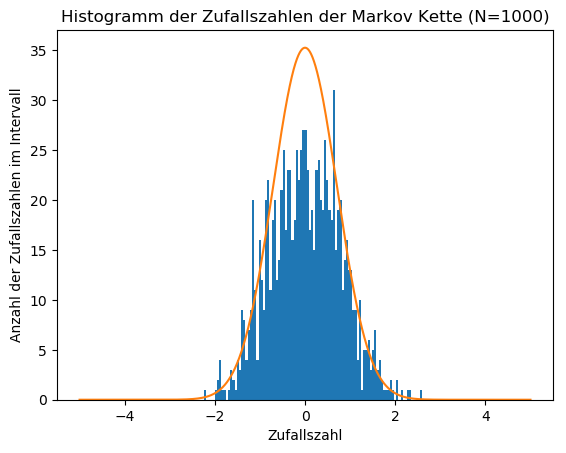

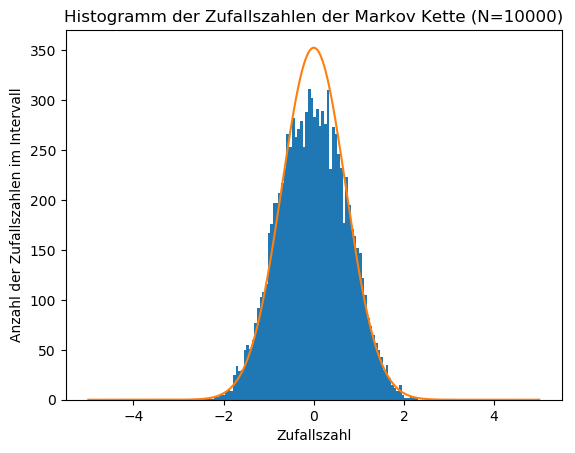

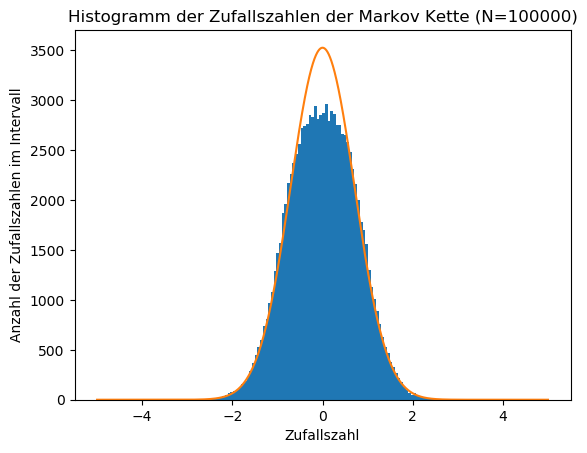

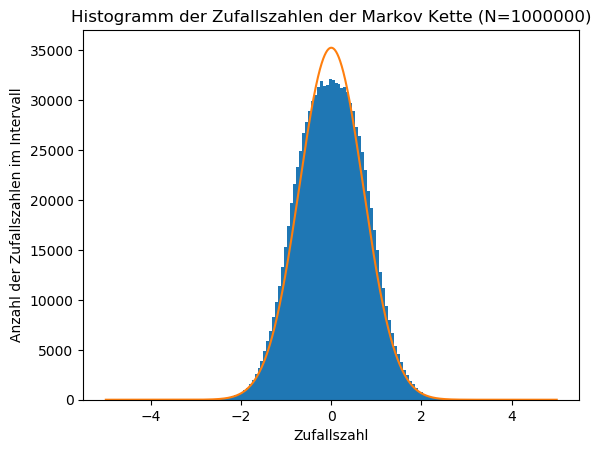

In [4]:
Xs = [10^3, 10^4, 10^5, 10^6]

for X in Xs
    figure(X)
    PyPlot.plt[:hist](metropolis(0, 2, X, W), 100)
    ys = []
    xs = linspace(-5, 5, 10000)
    for i in xs
        push!(ys, X/16*W(i))
    end
    plot(xs, ys)
    title("Histogramm der Zufallszahlen der Markov Kette (N=$X)")
    xlabel("Zufallszahl")
    ylabel("Anzahl der Zufallszahlen im Intervall")
    show()
end

Aufgabe 3c)

In [5]:
function metropolis_acceptance(x, h, N, w)
    accepted = total = 0
    while accepted < N
        r = 2*rand()-1
        y = x + h*r
        if(w(y)/w(x) >= rand())
            x = y
            accepted += 1
        end
        total += 1
    end
    return accepted/total
end

metropolis_acceptance (generic function with 1 method)

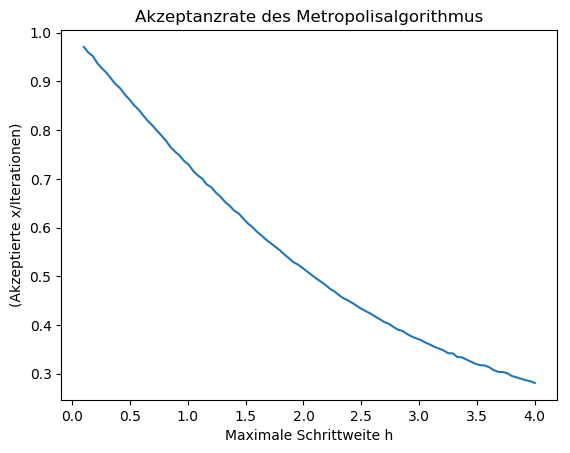

In [6]:
xs = linspace(0.1, 4, 100)
ys = []
for x in xs
    push!(ys, metropolis_acceptance(0.0, x, 10^5, W))
end
plot(xs, ys)
title("Akzeptanzrate des Metropolisalgorithmus")
xlabel("Maximale Schrittweite h")
ylabel("(Akzeptierte x/Iterationen)")
show()

Aufgabe 3d)

In [7]:
function metropolis_inverted(x, h, N, w)
    xs = []
    i = 1
    
    while i <= N
        r = 2*rand()-1
        y = x + h*r
        if(w(y)/w(x) >= rand())
            i += 1
        else
            push!(xs, y)
        end
    end
    return xs
end

metropolis_inverted (generic function with 1 method)

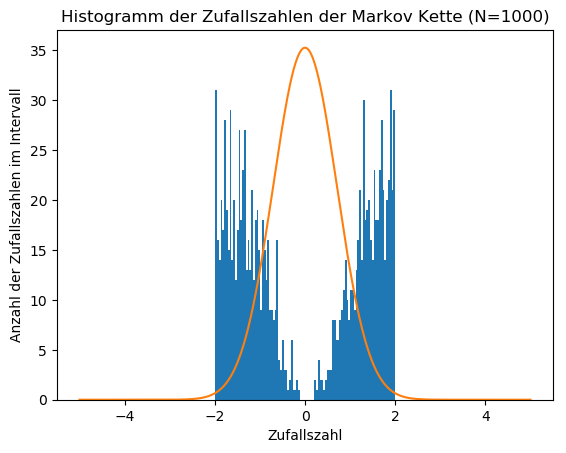

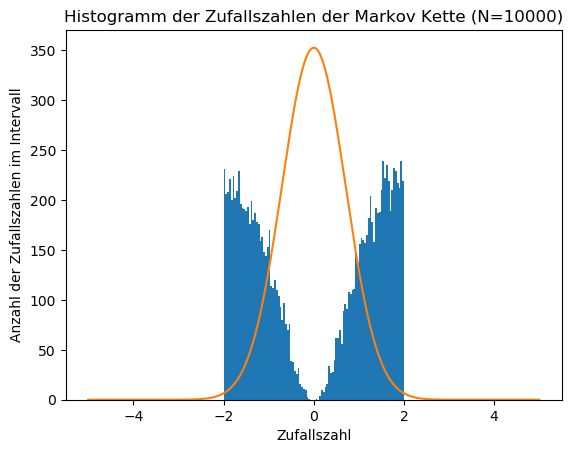

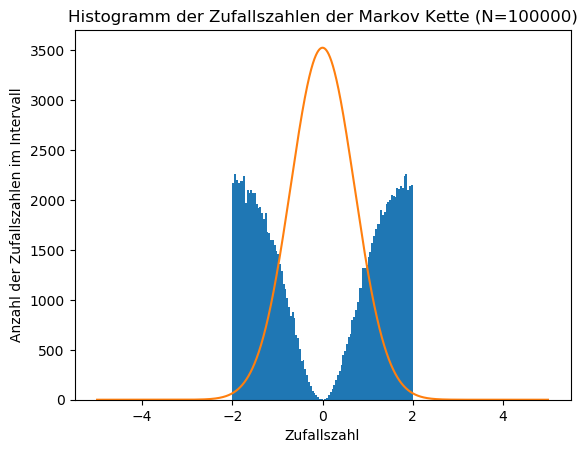

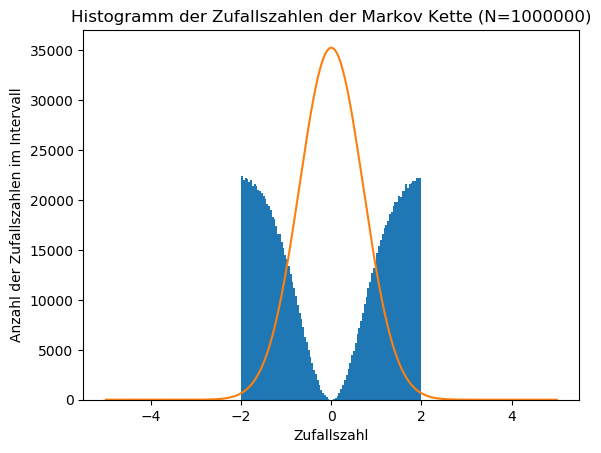

In [8]:
Xs = [10^3, 10^4, 10^5, 10^6]

for X in Xs
    figure(X)
    PyPlot.plt[:hist](metropolis_inverted(0, 2, X, W), 100)
    ys = []
    xs = linspace(-5, 5, 10000)
    for i in xs
        push!(ys, X/16*W(i))
    end
    plot(xs, ys)
    title("Histogramm der Zufallszahlen der Markov Kette (N=$X)")
    xlabel("Zufallszahl")
    ylabel("Anzahl der Zufallszahlen im Intervall")
    show()
end